In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
%matplotlib inline

In [2]:
dice = Table().with_column('Face',np.arange(1,7))
dice.with_column('Probability',1/6)

Face,Probability
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


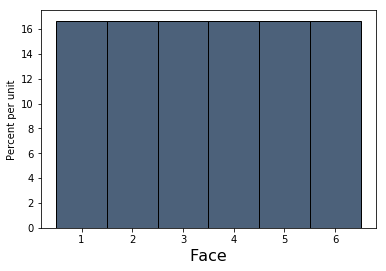

In [3]:
dice.hist('Face', bins=np.arange(0.5,7.5,1))

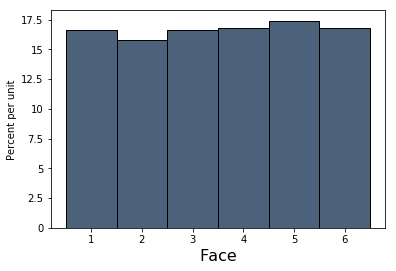

In [5]:
dice.sample(3000).hist("Face", bins=np.arange(0.5,7.5,1))

In [7]:
swain_proportions = make_array(0.26,0.74)
number_of_black_people_on_panel = 8

sample_proportions(100,swain_proportions).item(0) * 100

27.0

In [8]:
swain_experiment_size = 1000
number_of_black_people_on_panel = make_array()
for i in np.arange(swain_experiment_size):
    number_of_black_people_on_panel = np.append(number_of_black_people_on_panel, sample_proportions(100,swain_proportions).item(0) * 100)
    
swain_table = Table().with_column('Number of black people on panel', number_of_black_people_on_panel)

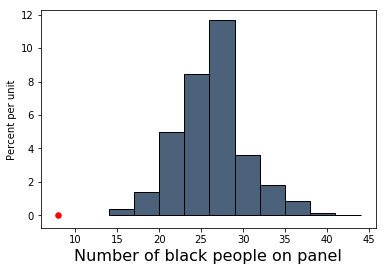

In [7]:
swain_table.hist()
plots.scatter(8,0,color="red",s=30)

In [8]:
pea_proportions = make_array(0.75,0.25)
np.abs((sample_proportions(929,pea_proportions) * 100).item(0) - 75)

23.0

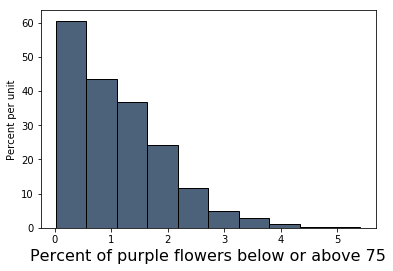

In [17]:
pea_expr_size = 1000
pea_purple_number = make_array()

for i in np.arange(pea_expr_size):
    pea_purple_number = np.append(pea_purple_number, np.abs((sample_proportions(929,pea_proportions) * 100).item(0) - 75))
    
Table().with_column("Percent of purple flowers below or above 75", pea_purple_number).hist()

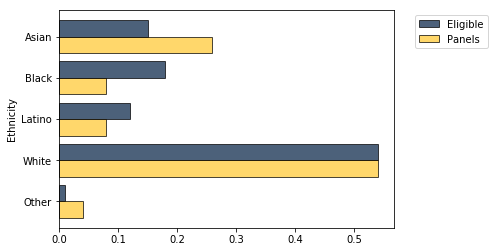

In [12]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)
eligible_proportion = jury.column(1)

jury.barh(0)

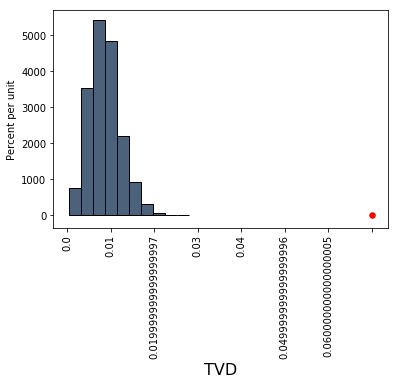

In [14]:
jury_expr_size = 10000
jury_proportions_array = make_array()

for i in np.arange(jury_expr_size):
    jury_proportions_array = np.append(jury_proportions_array, np.abs(sum(np.abs(jury.column(1)-sample_proportions(1500,eligible_proportion)))/2))
    
Table().with_column("TVD", jury_proportions_array).hist()
plots.scatter(0.14,0,color="red",s=30)

In [14]:
scores = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week6/scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [29]:
scores.group('Section', np.mean)

Section,Midterm mean
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [18]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [28]:
np.mean(scores.select(1).sample(27, with_replacement=False))

Midterm
16.7037


In [30]:
observed_mean = 13.6667

In [35]:
np.mean(scores.select(1).sample(27, with_replacement=False).column(0))

14.851851851851851

In [36]:
mean_experiment_size = 2000
mean_array = make_array()
for i in np.arange(mean_experiment_size):
    mean_array = np.append(mean_array, np.mean(scores.select(1).sample(27, with_replacement=False).column(0)))

mean_table = Table().with_column("Mean values", mean_array)

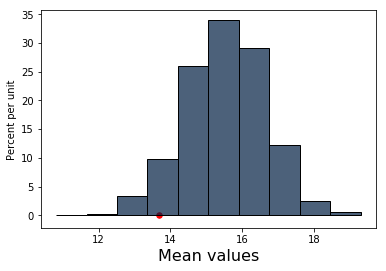

In [39]:
mean_table.hist()
plots.scatter(observed_mean,0,color="red",s=30)